In [43]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [44]:
train = pd.read_csv('E:\\sandlogics\\titanic_train.csv')

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
#Checking whether the datasets have null values or not
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

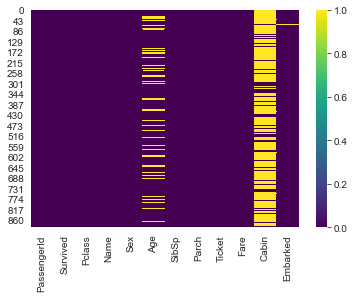

In [49]:
#Heatmap is drawn to check the null values in each column and we found out that there are some null values present in "Cabin and "Age" columns
sns.heatmap(train.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

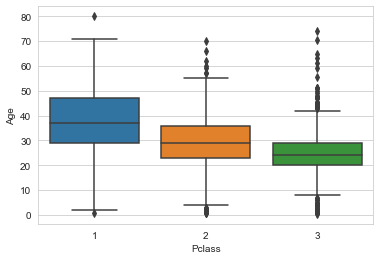

In [54]:
sns.boxplot(x='Pclass',y='Age',data=train)

Looking at the Boxplot from above we found out the average age of all the passengers int the ship with respect to the particular classes and add those values to the null values present in the age columns.  

In [51]:
def change_age_null(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [52]:
train['Age'] = train[['Age','Pclass']].apply(change_age_null,axis=1)

<AxesSubplot:>

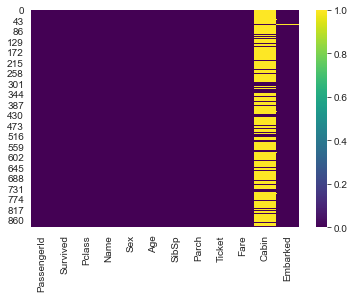

In [55]:
sns.heatmap(train.isnull(),cmap='viridis')

As there are lot of null values in Cabin column we will not be able to impute on that column so we can drop it.

In [69]:
train = train.drop('Cabin',axis=1)

KeyError: "['Cabin'] not found in axis"

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
train.dropna(inplace=True)

<AxesSubplot:>

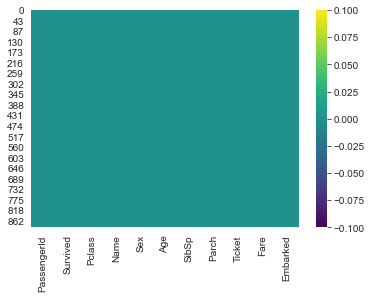

In [74]:
sns.heatmap(train.isnull(),cmap='viridis')

In [15]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

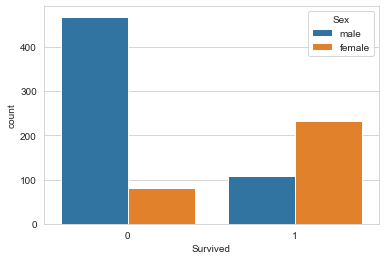

In [23]:
#Founded who survived and who didnt using countplot and keepingg hue as Sex,
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

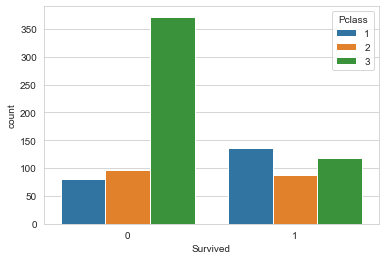

In [26]:
#this is the plot against Survived which is drawn for Pclass to check how many of them survived from all thr three classes
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Age'>

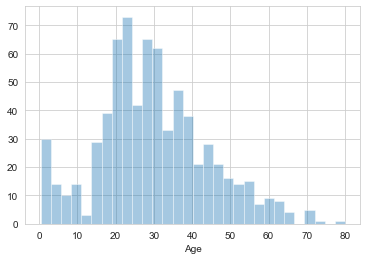

In [29]:
#to find the maximum number of age group in the titanic
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='Fare'>

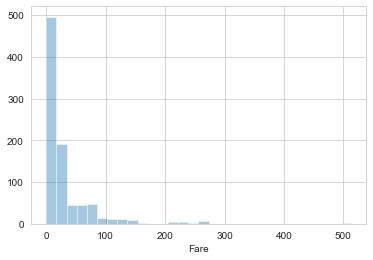

In [31]:
#By drawing a distplot for Fare we can find that most of the peoples fare was between 0 - 100 
#which means most of the passengers were from Class 3 
sns.distplot(train['Fare'],kde=False,bins=30)

Machine learning algorithm cant take features as inputs directly so the categorical features are converted to dummy variable format which will indicate 0 or 1 value with a column of actual value.

In [75]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


From above we can see that there is values for each category which is contradiction to eachother.To avoid this we should consider only one feature whose 0 value specify that it belongs to the other feature.

In [78]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [79]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [84]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [85]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [86]:
train = pd.concat([train,sex,embark],axis=1)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [90]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [91]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [120]:
X = train.drop('Survived',axis=1)
y = train['Survived']
import sklearn.linear_model as lm

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [123]:
from sklearn.linear_model import LogisticRegression

In [127]:
import sklearn.linear_model as lm

In [128]:
logreg = lm.LogisticRegression()

In [130]:
logreg.fit(X_train,y_train)

C:\Users\Shivani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
predictions = logreg.predict(X_test)

Classification Report: 
It is used to build a text report showing main classification metrics

In [132]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



By using the Classification report we got an accuracy of 79%.

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 39,  65]], dtype=int64)

Also by using confusion matrix we got an accuracy of 79% that is (148+65)/267.